### **Assignment 4**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("youth_smoking.csv")

In [3]:
print(data.head())

   Year Age_Group  Gender  Smoking_Prevalence  Drug_Experimentation  \
0  2024     15-19    Both               18.85                 32.40   
1  2024     10-14  Female               34.88                 41.57   
2  2023     10-14    Both               42.00                 56.80   
3  2024     40-49    Both               33.75                 42.90   
4  2023     15-19    Male               47.90                 39.62   

  Socioeconomic_Status  Peer_Influence School_Programs  Family_Background  \
0                 High               5             Yes                  1   
1                 High               6             Yes                 10   
2                 High               6             Yes                  2   
3               Middle              10              No                  9   
4                 High               1              No                  2   

   Mental_Health Access_to_Counseling  Parental_Supervision  \
0              5                   No          

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

In [5]:
print(data.describe(include='all'))

                Year Age_Group Gender  Smoking_Prevalence  \
count   10000.000000     10000  10000        10000.000000   
unique           NaN        10      3                 NaN   
top              NaN     20-24   Both                 NaN   
freq             NaN      1045   3415                 NaN   
mean     2022.000500       NaN    NaN           27.439257   
std         1.425027       NaN    NaN           12.975528   
min      2020.000000       NaN    NaN            5.000000   
25%      2021.000000       NaN    NaN           16.160000   
50%      2022.000000       NaN    NaN           27.355000   
75%      2023.000000       NaN    NaN           38.672500   
max      2024.000000       NaN    NaN           50.000000   

        Drug_Experimentation Socioeconomic_Status  Peer_Influence  \
count           10000.000000                10000    10000.000000   
unique                   NaN                    3             NaN   
top                      NaN                 High           

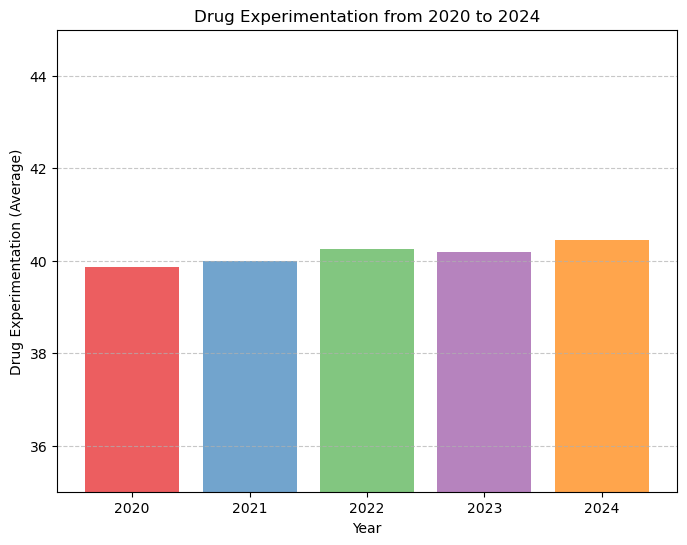

In [6]:
#2020-2024
data_filtered = data[(data['Year'] >= 2020) & (data['Year'] <= 2024)]

#calc averages
yearly_data = data_filtered.groupby('Year')['Drug_Experimentation'].mean()

#colors
colors = sns.color_palette("Set1", len(yearly_data))

plt.figure(figsize=(8, 6))
bars = plt.bar(yearly_data.index, yearly_data.values, color=colors, alpha=0.7)


plt.title('Drug Experimentation from 2020 to 2024')
plt.xlabel('Year')
plt.ylabel('Drug Experimentation (Average)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.ylim(35,45)


plt.show()

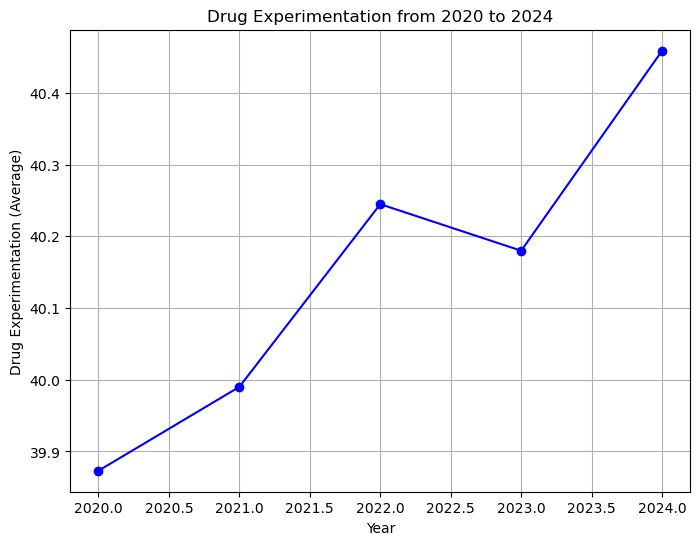

In [7]:
data_filtered = data[(data['Year'] >= 2020) & (data['Year'] <= 2024)]

    
yearly_data = data_filtered.groupby('Year')['Drug_Experimentation'].mean()

    
plt.figure(figsize=(8, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-', color='b')

   
plt.title('Drug Experimentation from 2020 to 2024')
plt.xlabel('Year')
plt.ylabel('Drug Experimentation (Average)')
plt.grid(True)
    
   
plt.show()

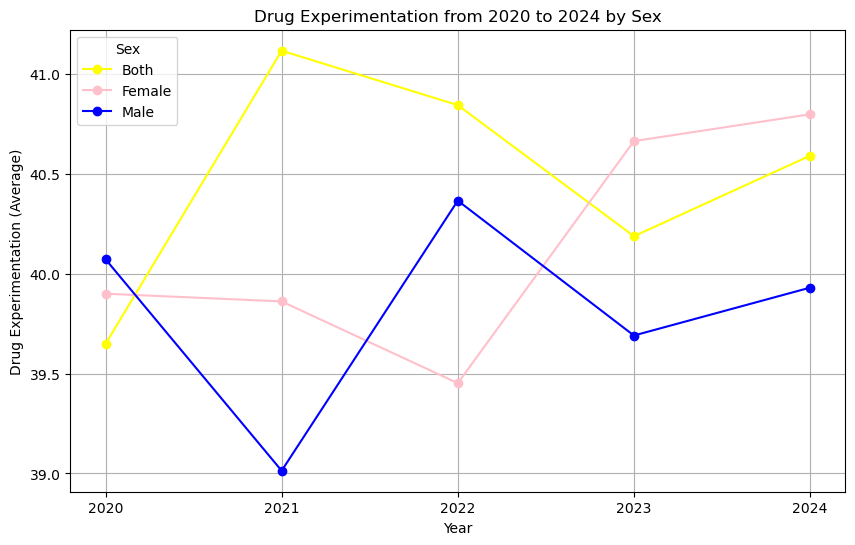

In [8]:
if 'Year' in data.columns and 'Drug_Experimentation' in data.columns and 'Gender' in data.columns:
    data_filtered = data[(data['Year'] >= 2020) & (data['Year'] <= 2024)]

    #grouped
    yearly_sex_data = data_filtered.groupby(['Year', 'Gender'])['Drug_Experimentation'].mean().unstack()

    
    plt.figure(figsize=(10, 6))
    for sex in yearly_sex_data.columns:
        if sex == 'Female':
            plt.plot(yearly_sex_data.index, yearly_sex_data[sex], marker='o', linestyle='-', color='pink', label='Female')
        elif sex == 'Male':
            plt.plot(yearly_sex_data.index, yearly_sex_data[sex], marker='o', linestyle='-', color='blue', label='Male')
        else:
            plt.plot(yearly_sex_data.index, yearly_sex_data[sex], marker='o', linestyle='-', color='yellow', label='Both')

    
    plt.title('Drug Experimentation from 2020 to 2024 by Sex')
    plt.xlabel('Year')
    plt.ylabel('Drug Experimentation (Average)')
    plt.legend(title='Sex')
    plt.grid(True)
    plt.xticks(yearly_sex_data.index)
    
    
    plt.show()